# Week 4 - 30/10/17

(contd.)

This week we're switching to jupyter notebooks, because figures were getting a bit much.

In [2]:
from hm.analysis.explicit_tripoint import anaTP, epsChangeY

This is probing the effect of using $\tilde{m_b} = \tilde{m_j} + \tilde{m_k} − T_{ij} − T{ji}$

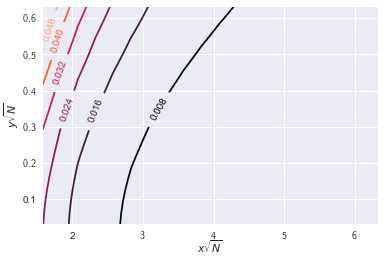

In [ ]:
anaTP(0.05,0.2,0.001,0.02,20,1000, model='gravity', ib=True, tildeM=False, heatmap=False)
anaTP(0.05,0.2,0.001,0.02,20,1000, model='gravity', ib=True, tildeM=True, heatmap=False) # tildeM correction

**TODO** add up results from multiple different distributions and average them

# Week 5 - 6/10/17

Main objectives:

- Try plotting analytical solution for $\epsilon$
- Average $\epsilon$ over multiple distributions
- Look further into the effect of different $\gamma$ on $\epsilon$ as well as using the exponential function in the gravity model
- Try incorporating the other mobility models into the explicit epsilon framework

Need to find an analytical expression for $\epsilon$ using the exponential distance function in the gravity model,

$$f(r_{ij}) = e^{-\beta r_{ij}}$$

\[insert derivation here\]

## Incorporating other mobility models

For the radiation model:

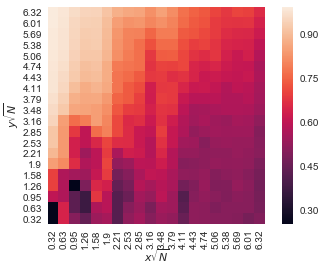

In [4]:
anaTP(0.01,0.2,0.01,0.2,20,1000, model='radiation', ib=False)

## Ideas

- Need to remember that there are in fact $N+3$ and $N+2$ locations in the tri-point and two-point distributions respectively.